# Step 1: Inspect the Data
I began by inspecting the CSV files provided to understand the kind of information they held. The files were named consistently and contained census data such as state names, population, income, and gender demographics.


# Step 2: Load Data into DataFrames
Using the 'glob' module, I loaded all the CSV files into separate DataFrames and concatenated them into one comprehensive DataFrame called 'us_census'.

In [4]:
import pandas as pd
import glob

# Use glob to get all the files that match the pattern
files = glob.glob("states*.csv")

# Initialize an empty list to hold dataframes
states_list = []

# Loop through the files and read them into dataframes, then append to the list
for filename in files:
    data = pd.read_csv(filename)
    states_list.append(data)

# Concatenate all dataframes in the list into a single dataframe
us_census = pd.concat(states_list)


# Step 3: Inspect the DataFrame
To understand the structure of the concatenated DataFrame, I inspected the columns and data types.


In [7]:
print(us_census.columns)
print(us_census.dtypes)


Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


### Step 4: Inspect the DataFrame

Examine the first few rows of the DataFrame to understand why some columns have `object` data types instead of `integers` or `floats`. Use the following code to view the initial rows and identify any non-numeric characters or inconsistencies:


In [12]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


# Step 4: Convert the Income Column to Numeric
The Income column had dollar signs and commas which needed to be removed before converting it to a numeric data type.


In [27]:
# Remove dollar signs and commas from the Income column
us_census['Income'] = us_census['Income'].replace({r'\$': '', ',': ''}, regex=True)

# Convert the Income column to numeric
us_census['Income'] = pd.to_numeric(us_census['Income'])


In [29]:
print(us_census['Income'])

0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
Name: Income, dtype: float64


# Step 5: Split the GenderPop Column
I split the GenderPop column into separate Men and Women columns to facilitate analysis.


In [37]:
# Split the GenderPop column into Men and Women columns
gender_split = us_census['GenderPop'].str.split('_')
us_census['Men'] = gender_split.str[0].str[:-1]
us_census['Women'] = gender_split.str[1].str[:-1]

# Convert Men and Women columns to numeric
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

us_census.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0


# Step 6: Fill Missing Values in the Women Column
I handled missing values in the Women column by using the TotalPop and Men columns.


In [35]:
# Fill missing values in the Women column
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])


# Step 7: Drop Duplicate Rows
To ensure data quality, I checked for and dropped any duplicate rows in the DataFrame.


In [40]:
# Drop duplicate rows
us_census = us_census.drop_duplicates(subset=us_census.columns[1:])


# Step 8: Calculate the Proportion of Women in Each State
I added a new column to the DataFrame to calculate the proportion of women in each state.


In [43]:
# Calculate the proportion of women in each state
us_census['ProportionWomen'] = us_census['Women'] / us_census['TotalPop']


# Step 9: Create the Scatter Plot
Finally, I created a scatter plot to visualize the relationship between average income and the proportion of women in each state.


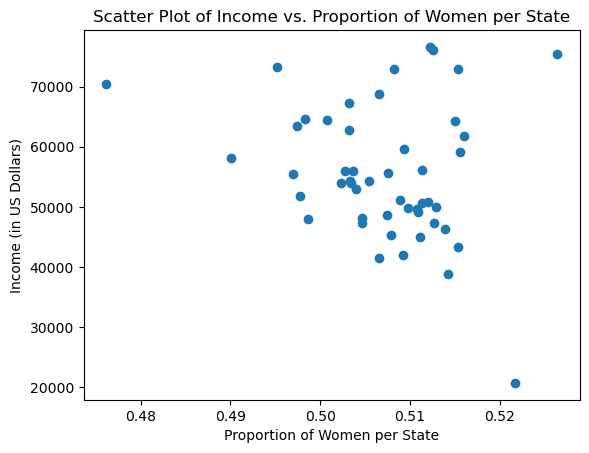

In [46]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(us_census['ProportionWomen'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Proportion of Women per State")
plt.xlabel("Proportion of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
